# Udacity Bertelsmann Data Science Challenge

---



This Jupyter notebook is used by the HealthHackers group to collaborate on the Python code for classifying patients into risk groups for the Bertelsmann-Udacity Project Showcase Challenge.


## Python Implementation

---



**1. Upload the dataset from your local drive**





In [0]:
'''
Load combined_excel.csv from your local drive
'''

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

**2. Load the CSV file into data structure**

In [0]:
import csv

count = 0

'''
  Load the csv file into a nested list 
'''
with open("combined_excel.csv", 'r') as f:
  reader = csv.reader(f)
  file_data = list(reader)

**3. Define function for analyzing the data**

In [0]:
def analyze_data(row_data):
  
  if row_data['flt3_allelic_ratio'] != 'Not Done' and float(row_data['flt3_allelic_ratio']) > 0.4:
    return 'high'
  elif row_data['npm'] == 'Mutated':
    return 'low'
  elif row_data['down_syndrome'] == 1 and int(row_data['age']) >= 4:
    return 'low'
  elif row_data['abnormalities'] == '':
    return 'standard'
  else:
    for sub_idx in range(len(row_data['abnormalities'])):
      abnormality = row_data['abnormalities'][sub_idx]
      if 'inv(16)' in abnormality:
        
        return 'low'
      elif 't(8;21)' in abnormality:
        
        return 'low'
      elif abnormality == '-7q':
        return 'high'
      elif abnormality == '-7':
        return 'high'
      elif abnormality == '-5q':
        return 'high'
      elif abnormality == '-5':
        return 'high' 
      elif len(set(row_data['abnormalities'])) >= 4:
        return 'high' 
  return 'standard'

In [0]:
def analyze_data(row_data):
  
  if row_data['flt3_allelic_ratio'] != 'Not Done' and float(row_data['flt3_allelic_ratio']) > 0.4:
    row_data['riskcause']= 'flt3'
    return 'high'
  elif row_data['npm'] == 'Mutated':
    row_data['riskcause']= 'npm'
    return 'low'
  elif row_data['down_syndrome'] == 1 and int(row_data['age']) >= 4:
    row_data['riskcause']= 'down_syndrome'
    return 'low'
  elif row_data['abnormalities'] == '':
    return 'standard'
  else:
    #row_data['riskcause']= 'abnormality in karyotype'
    for sub_idx in range(len(row_data['abnormalities'])):
      abnormality = row_data['abnormalities'][sub_idx]
      if 'inv(16)' in abnormality:
        row_data['riskcause']= 'inv(16)'
        return 'low'
      elif 't(8;21)' in abnormality:
        row_data['riskcause']= 't(8;21)'
        return 'low'
      elif abnormality == '-7q':
        row_data['riskcause']= '-7q'
        return 'high'
      elif abnormality == '-7':
        row_data['riskcause']= '-7'
        return 'high'
      elif abnormality == '-5q':
        row_data['riskcause']= '-5q'
        return 'high'
      elif abnormality == '-5':
        row_data['riskcause']= '-5'
        return 'high' 
      elif len(set(row_data['abnormalities'])) >= 4:
        row_data['riskcause']= 'four abnormalities and higher'
        return 'high' 
  row_data['riskcause']= 'not low not high'
  return 'standard'

**4. Define function for processing the data**

In [0]:
def process_and_analyze_data(data):
  processed_data = dict()
  
  for idx in range(1, len(data)):
    row_data = dict()
    
    pieces = len(data[idx])
    temp = [x.strip() for x in data[idx][0].split(',')]
    temp[len(temp)-1] = temp[len(temp)-1].split('[')[0]
    if len(temp) > 1:
      row_data['abnormalities'] = temp[2:len(temp)]

      row_data['npm'] = data[idx][pieces-1]
      row_data['age'] = data[idx][pieces-2]
      row_data['down_syndrome'] = data[idx][pieces-3]
      row_data['flt3_allelic_ratio'] = data[idx][pieces-4]

      row_data['risk'] = analyze_data(row_data)
    else:
      row_data['riskcause']= 'Chromosome row in Karyotype'
      row_data['risk'] = 'no risk'
    processed_data[idx] = row_data
    
    
    
    
  
  return processed_data


**5. Identify risk classification by running code for processing and analyzing the data **

In [0]:
processed_data = process_and_analyze_data(file_data)
print(processed_data)


'''
Print processed data
'''
#list containing all risks 
riskList = []
riskCause = []

for key, value in processed_data.items():
  riskList.append(value['risk'])
  riskCause.append(value['riskcause'])
  print(key, value['risk'], value['riskcause'])


**6. Descriptive Statistics**

In [0]:
import pandas as pd 
df = pd.read_csv("combined_excel.csv")
print(df.describe())

**7. Finding the coorelation between the age and risk of patients**
Motivated by https://stackoverflow.com/questions/44694228/how-to-check-for-correlation-among-continuous-and-categorical-variables-in-pytho

In [0]:
#Converting the dict type as dataframe 
import pandas as pd 
import numpy as np
dataframe_data = pd.read_csv("combined_excel.csv")

#dataframe_data = dataframe_data.drop('abnormalities', 1)

#print(dataframe_data)
dataframe_data['risk'] = riskList
#dataframe_data['riskcause'] = riskCause
#print(dataframe_data)

#print(dataframe_data)
# Check how to drop more than one columns at a time 
dataframe_data = dataframe_data.drop('Karyotype', 1)

dataframe_data = dataframe_data.drop('FLT3 Allelic Ratio', 1)
dataframe_data = dataframe_data.drop('Down syndrome', 1)
dataframe_data = dataframe_data.drop('Nucleophosmin (NPM)', 1)
#dataframe_data['Age'].corr(dataframe_data['risk'])
# dict_risk = { 'low': 0, 'high': 1, 'standard':2, 'no risk':3}
# dataframe_data.risk = [dict_risk[item] for item in dataframe_data.risk]
# # print(dataframe_data.corr(method='spearman'))
# x = dataframe_data.values
# correlation_matrix = np.corrcoef(x.T)
# print(correlation_matrix)

df_dummies = pd.get_dummies(dataframe_data['risk'])
#print(df_dummies)
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([dataframe_data, df_dummies], axis=1)
#print(df_new)
del df_new['risk']
#print(df_new)
x = df_new.values
#print(x)
correlation_matrix = np.corrcoef(x.T)
print("Correlation matrix between Age, High, Low and Standard")
print(correlation_matrix)




**8. Visualizing Data**

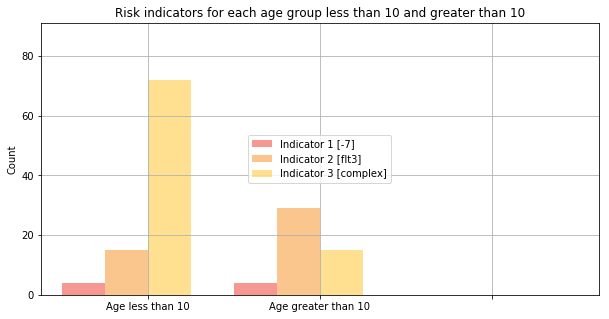

In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

'''create the dataframe '''
raw_data = {'risk': ['Age less than 10', 'Age greater than 10', ''],
        'cause1': [4, 4, 0],
        'cause2': [15, 29, 0],
        'cause3': [72, 15, 0]}
df = pd.DataFrame(raw_data, columns = ['risk', 'cause1', 'cause2', 'cause3'])

# Setting the positions and width for the bars
pos = list(range(len(df['cause1']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['cause1'] data,
        df['cause1'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in risk
        label=df['risk'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['cause2'] data,
        df['cause2'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in risk
        label=df['risk'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['cause3'] data,
        df['cause3'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in risk
        label=df['risk'][2]) 

# Set the y axis label
ax.set_ylabel('Count')

# Set the chart's title
ax.set_title('Risk indicators for each age group less than 10 and greater than 10')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['risk'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['cause1'] + df['cause2'] + df['cause3'])] )

# Adding the legend and showing the plot
plt.legend(['Indicator 1 [-7] ', 'Indicator 2 [flt3]', 'Indicator 3 [complex]'], loc='center')
plt.grid()
plt.show()

**Age wise FLT high risk plot**

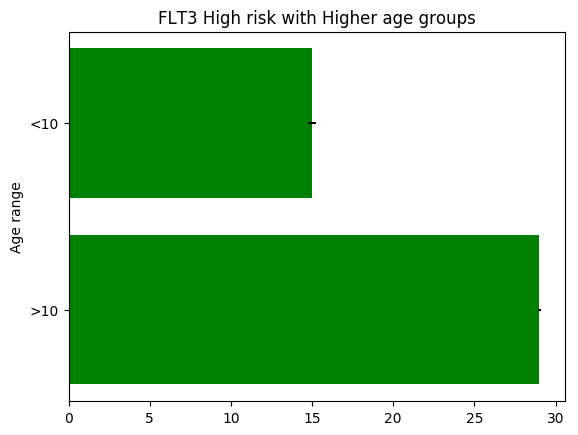

In [0]:
"""
====================
Horizontal bar chart
====================

This example showcases a simple horizontal bar chart.
"""
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('<10', '>10')
y_pos = np.arange(len(people))
performance = (15, 29)
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('Age range')
ax.set_title('FLT3 High risk with Higher age groups')

plt.show()

In [0]:
'''
Load combined_excel.csv from your local drive
'''
​
from google.colab import files
​
uploaded = files.upload()
​
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
import pandas as pd
specific_risk_data = pd.read_csv("")

**Code to download CSV from dataframe**

In [0]:
import pandas as pd 
#dataframe created from dict 
dataframe_data = pd.DataFrame.from_dict(processed_data)
#dataframe_data.to_csv(processed_file, sep='\t', encoding='utf-8')
from google.colab import files

dataframe_data.to_csv('df.csv')
files.download('df.csv')